In [1]:
%load_ext autoreload
%matplotlib widget
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_color_value,
    reconstruct_image_from_general,
    plot_full,
    find_nearest_edge
)
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    get_width_info,
    get_width_info_new,
)
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
)
import pandas as pd
from amftrack.pipeline.functions.spore_processing.spore_id import make_spore_data
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    resolve_anastomosis_crossing_by_root,
)
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Node,
    Edge,
    Hyphae,
)
from datetime import datetime
from matplotlib import cm
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from IPython.display import clear_output
from amftrack.pipeline.functions.post_processing.exp_plot import *


/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2023-05-09 08:19:34.982810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 08:19:35.507079: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfs/home2/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/cv2/../../lib64:
2023-05-09 08:19:35.507127: I tensorflow/stream_executor/cuda/cudart_stub.cc:29

In [5]:
plates = [
    # "799_20211001",
    # "803_20211012",
    # "809_20211012",
    "907_20220321",
    # "943_20220322",
    # "403_20221005",
    # "408_20221013",
    # "88_20210915",
    # "790_20210907",
    # "69_20201119",
    # "94_20201123",
    # "59_20201126",
    # "139_20201214",
    # "40_20201214",
    # "599_20201217",
]
plates = ['1014_20220525', '1023_20220502', '1042_20220523',
       '1045_20220504', '1048_20220506', '1053_20220413',
       '127_20220705', '130_20220707', '30_20220509',
       '32_20220428', '33_20220502', '800_20210928']
# plates = [
#     "26_20210104",
#     "52_20220707",
#     "56_20220701",
#     "59_20201126",
#     "69_20201119",
#     "76_20210108",
#     "81_20220704",
#     "84_20220621",
#     "94_20201123",
#     "102_20201226",
#     "152_20201224",
#     "792_20210915",
#     "799_20211001"
    
# ]
directory_targ = directory_project
update_analysis_info(directory_targ)
analysis_info = get_analysis_info(directory_targ)
analysis_folders = analysis_info.loc[analysis_info["unique_id"].isin(plates)]
# update_plate_info(directory_targ, local=True)
# all_folders = get_current_folders(directory_targ, local=True)

In [3]:
all_folders['unique_id'].unique()
# select = select.loc[select['/Analysis/skeleton_compressed.mat']==False]

array(['152_20201224', '81_20220704', '792_20210915', '102_20201226',
       '69_20201119', '59_20201126', '76_20210108', '94_20201123'],
      dtype=object)

In [37]:
for path in select['total_path']:
    print(path)
    shutil.rmtree(path)

/projects/0/einf914/data/20211014_1311_Plate21
/projects/0/einf914/data/20211015_1913_Plate21
/projects/0/einf914/data/20211013_1957_Plate21
/projects/0/einf914/data/20211014_0756_Plate21
/projects/0/einf914/data/20211014_1911_Plate21
/projects/0/einf914/data/20211014_0156_Plate21
/projects/0/einf914/data/20211012_0153_Plate21
/projects/0/einf914/data/20211015_1312_Plate21
/projects/0/einf914/data/20211015_0711_Plate21
/projects/0/einf914/data/20211012_0753_Plate21
/projects/0/einf914/data/20210915_1918_Plate21
/projects/0/einf914/data/20211011_1953_Plate21
/projects/0/einf914/data/20211015_0111_Plate21
/projects/0/einf914/data/20211013_1354_Plate21


In [3]:
plates = [
    # "799_20211001",
    # "803_20211012",
    # "809_20211012",
    "907_20220321",
    # "943_20220322",
    # "403_20221005",
    # "408_20221013",
    # "88_20210915",
    # "790_20210907",
    # "69_20201119",
    # "94_20201123",
    # "59_20201126",
    # "139_20201214",
    # "40_20201214",
    # "599_20201217",
]

In [6]:
# plates = [
#     "52_20220707",
#     "56_20220701",
#     "59_20201126",
#     "69_20201119",
#     "76_20210108",
#     # "81_20220704",
#     "84_20220621",
#     "94_20201123",
#     # "102_20201226",
#     # "152_20201224",
#     # "792_20210915",
#     "1076_20220511",
#     "941_20220404"
# ]

# plates = ['1014_20220525', '1023_20220502', '102_20201226', '1042_20220523',
#        '1045_20220504', '1048_20220506', '1053_20220413',
#        '127_20220705', '130_20220707', '152_20201224', '30_20220509',
#        '32_20220428', '33_20220502', '52_20220707', '76_20210108',
#        '792_20210915', '799_20211001', '800_20210928', '84_20220621', '94_20201123',"56_20220701","59_20201126","69_20201119","81_20220704"]
analysis_folders = analysis_info.loc[analysis_info["unique_id"].isin(plates)]
# analysis_folders = analysis_info.loc[analysis_info["unique_id"].isin(['94_20201123'])]

select = analysis_folders
select

,folder_analysis,version,total_path,Plate,strain,medium,CrossDate,date,unique_id,datetime,...,path_time_hypha_info,path_time_plate_info,path_global_plate_info,date_run_analysis,PrincePos,root,split,Pbait,Temperature,Temp
16,Analysis_33_20220502_188_Version1,Version1,/projects/0/einf914/data/20220502_2111_Plate07,33,'Agg','001P100N100C',20220502,"02.05.2022, 21:11:",33_20220502,2022-05-02 21:11:00,...,Analysis_33_20220502_188_Version1/time_hypha_info,Analysis_33_20220502_188_Version1/time_plate_i...,Analysis_33_20220502_188_Version1/global_plate...,"01.01.1970, 01:00:",7,'Carrot','Y','-',25,NaN
29,Analysis_1023_20220502_200_Version1,Version1,/projects/0/einf914/data/20220502_1604_Plate15,1023,'C2','001P100N200C',20220502,"02.05.2022, 16:04:",1023_20220502,2022-05-02 16:04:00,...,Analysis_1023_20220502_200_Version1/time_hypha...,Analysis_1023_20220502_200_Version1/time_plate...,Analysis_1023_20220502_200_Version1/global_pla...,"01.01.1970, 01:00:",15,'Carrot','Y','-',25,NaN
34,Analysis_1042_20220523_200_Version1,Version1,/projects/0/einf914/data/20220524_1314_Plate06,1042,'C2','001P100N100C',20220523,"24.05.2022, 13:14:",1042_20220523,2022-05-24 13:14:00,...,Analysis_1042_20220523_200_Version1/time_hypha...,Analysis_1042_20220523_200_Version1/time_plate...,Analysis_1042_20220523_200_Version1/global_pla...,"01.01.1970, 01:00:",6,'Carrot','Y','-',25,NaN
38,Analysis_32_20220428_200_Version1,Version1,/projects/0/einf914/data/20220428_1924_Plate20,32,'Agg','001P100N100C',20220428,"28.04.2022, 19:24:",32_20220428,2022-04-28 19:24:00,...,Analysis_32_20220428_200_Version1/time_hypha_info,Analysis_32_20220428_200_Version1/time_plate_i...,Analysis_32_20220428_200_Version1/global_plate...,"01.01.1970, 01:00:",20,'Carrot','Y','-',25,NaN
44,Analysis_800_20210928_200_Version1,Version1,/scratch-shared/amftrack/stitch_temp2/20210929...,800,'A5','001P100N',20210928,"29.09.2021, 09:42:",800_20210928,2021-09-29 09:42:00,...,Analysis_800_20210928_200_Version1/time_hypha_...,Analysis_800_20210928_200_Version1/time_plate_...,Analysis_800_20210928_200_Version1/global_plat...,"01.01.1970, 01:00:",31,'Carrot','Y','-',nan,nan
47,Analysis_127_20220705_200_Version1,Version1,/projects/0/einf914/data/20220705_1810_Plate17,127,'C2','001P100N100C',20220705,"05.07.2022, 18:10:",127_20220705,2022-07-05 18:10:00,...,Analysis_127_20220705_200_Version1/time_hypha_...,Analysis_127_20220705_200_Version1/time_plate_...,Analysis_127_20220705_200_Version1/global_plat...,"01.01.1970, 01:00:",17,'Carrot','Y','-',25,NaN
62,Analysis_1048_20220506_200_Version1,Version1,/projects/0/einf914/data/20220506_2350_Plate03,1048,'C2','001P100N100C',20220506,"06.05.2022, 23:50:",1048_20220506,2022-05-06 23:50:00,...,Analysis_1048_20220506_200_Version1/time_hypha...,Analysis_1048_20220506_200_Version1/time_plate...,Analysis_1048_20220506_200_Version1/global_pla...,"01.01.1970, 01:00:",3,'Carrot','Y','-',25,nan
85,Analysis_130_20220707_200_Version1,Version1,/projects/0/einf914/data/20220707_1452_Plate05,130,'C2','001P100N100C',20220707,"07.07.2022, 14:52:",130_20220707,2022-07-07 14:52:00,...,Analysis_130_20220707_200_Version1/time_hypha_...,Analysis_130_20220707_200_Version1/time_plate_...,Analysis_130_20220707_200_Version1/global_plat...,"01.01.1970, 01:00:",5,'Carrot','Y','-',25,NaN
88,Analysis_30_20220509_200_Version1,Version1,/projects/0/einf914/data/20220510_1437_Plate12,30,'Agg','001P100N200C',20220509,"10.05.2022, 14:37:",30_20220509,2022-05-10 14:37:00,...,Analysis_30_20220509_200_Version1/time_hypha_info,Analysis_30_20220509_200_Version1/time_plate_i...,Analysis_30_20220509_200_Version1/global_plate...,"01.01.1970, 01:00:",12,'Carrot','Y','-',25,NaN
93,Analysis_1014_20220525_100_Version1,Version1,/projects/0/einf914/data/20220525_1932_Plate01,1014,'C2','001P100N100C',20220525,"25.05.2022, 19:32:",1014_20220525,2022-05-25 19:32:00,...,Analysis_1014_20220525_100_Version1/time_hypha...,Analysis_1014_20220525_100_Version1/time_plate...,Analysis_1014_20220525_100_Version1/global_pl

In [6]:
all_folders.loc[all_folders['unique_id']=="1076_20220511"]

,total_path,Plate,PrincePos,root,strain,medium,split,Temp,CrossDate,/Img/TileConfiguration.txt.registered,...,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Pbait,Temperature,unique_id,datetime
6,/projects/0/einf914/data/20220608_0612_Plate14,1076,14,'Carrot','A5','001P100N200C','Y',NaN,20220511,True,...,True,True,True,True,"08.06.2022, 06:12:",20220608_0612_Plate14,'-',25,1076_20220511,2022-06-08 06:12:00
7,/projects/0/einf914/data/20220602_1350_Plate14,1076,14,'Carrot','A5','001P100N200C','Y',NaN,20220511,True,...,True,True,True,True,"02.06.2022, 13:50:",20220602_1350_Plate14,'-',25,1076_20220511,2022-06-02 13:50:00
16,/projects/0/einf914/data/20220512_0941_Plate14,1076,14,'Carrot','A5','001P100N200C','Y',NaN,20220511,True,...,True,True,True,True,"12.05.2022, 09:41:",20220512_0941_Plate14,'-',25,1076_20220511,2022-05-12 09:41:00
20,/projects/0/einf914/data/20220610_1308_Plate14,1076,14,'Carrot','A5','001P100N200C','Y',NaN,20220511,True,...,True,True,True,True,"10.06.2022, 13:08:",20220610_1308_Plate14,'-',25,1076_20220511,2022-06-10 13:08:00
21,/projects/0/einf914/data/20220602_0349_Plate14,1076,14,'Carrot','A5','001P100N200C','Y',NaN,20220511,True,...,True,True,True,True,"02.06.2022, 03:49:",20220602_0349_Plate14,'-',25,1076_20220511,2022-06-02 03:49:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,/projects/0/einf914/data/20220518_0126_Plate14,1076,14,'Carrot','A5','001P100N200C','Y',NaN,20220511,True,...,True,True,True,True,"18.05.2022, 01:26:",20220518_0126_Plate14,'-',25,1076_20220511,2022-05-18 01:26:00
2278,/projects/0/einf914/data/20220604_2340_Plate14,1076,14,'Carrot','A5','001P100N200C','Y',NaN,20220511,True,...,True,True,True,True,"04.06.2022, 23:40:",20220604_2340_Plate14,'-',25,1076_20220511,2022-06-04 23:40:00
2294,/projects/0/einf914/data/20220607_0540_Plate14,1076,14,'Carrot','A5','001P100N200C','Y',NaN,20220511,True,...,True,True,True,True,"07.06.2022, 05:40:",20220607_0540_Plate14,'-',25,1076_20220511,2022-06-07 05:40:00
2301,/projects/0/einf914/data/20220526_1211_Plate14,1076,14,'Carrot','A5','001P100N200C','Y',NaN,20220511,True,...,True,True,True,True,"26.05.2022, 12:11:",20220526_1211_Plate14,'-',25,1076_20220511,2022-05-26 12:11:00


In [39]:
%load_ext autoreload
%matplotlib widget
%autoreload 2
from amftrack.pipeline.functions.post_processing.area_hulls import *
from amftrack.pipeline.functions.post_processing.time_plate import *

from amftrack.pipeline.launching.run_super import run_parallel_post
name_job = "density2"

time = "1:00:00"
directory = directory_targ
max_ind = 20
incr = 100

# fs = [
#     get_density_active_tips_in_ring,
    # get_rate_stop_in_ring,
#     # get_num_BAS_tips
# ]
# fs = [get_mean_speed_in_ring]

# list_f = []
# list_args = []

# for f in fs:
#     list_f += [f] * max_ind

#     list_args += [{"incr": incr, "i": i, "rh_only": True} for i in range(max_ind)]

# list_f = [get_density_active_tips_in_ring] * max_ind+[get_density_branch_rate_in_ring] * max_ind

# list_args = [{"incr": incr, "i": i, "rh_only": True,"max_t" : 99} for i in range(max_ind)]
# list_args += [{"incr": incr, "i": i, "rh_only": False,"max_t" : 99} for i in range(max_ind)]
# list_f =[get_density_stop_rate_in_ring] * max_ind
# list_args = [{"incr": incr, "i": i, "rh_only": False,"max_t" : 99} for i in range(max_ind)]
list_f = [
    get_spore_volume,
    get_num_spores,
]
list_args = [{}] * len(list_f)
overwrite = False
num_parallel = 6
run_parallel_post(
    "time_plate_post_process.py",
    list_f,
    list_args,
    [directory, overwrite],
    analysis_folders,
    num_parallel,
    time,
    "time_plate_post_process",
    cpus=32,
    name_job=name_job,
    node="fat",
    dependency=False,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2691821


In [6]:
len(list_args),len(list_f)

(40, 40)

In [7]:
from amftrack.pipeline.launching.run_super import run_parallel_post
from amftrack.pipeline.functions.post_processing.area_hulls import *
from amftrack.pipeline.functions.post_processing.time_plate import *

%load_ext autoreload
%autoreload 2
directory = directory_targ
overwrite = False
load_graphs = True
name_job = "density3"
# list_f = [
#     get_length_tot,
# ]
# list_args = [{}] * len(list_f)
max_ind = 20
incr = 100
num_parallel = 30
time = "1:00:00"
fs = [
    # get_std_tip_in_ring_new_bootstrap,
    # get_density_in_ring,
    get_density_in_ring_new,
    # get_density_in_ring_new_bootstrap,
]

list_f = []
list_args = []

for f in fs:
    list_f += [f] * 20

    list_args += [{"incr": incr, "i": i, "rh_only": True} for i in range(0,20)]
args = [directory, True,True]
directory_targ=directory
for index, row in select.iterrows():
    folder = row["folder_analysis"]
    path_time_plate_info = row["path_time_plate_info"]
    plate = row["Plate"]
    num_cpus = 32
    if os.path.isfile(f"{directory_targ}{path_time_plate_info}"):
        whole_plate_info = pd.read_json(
            f"{directory_targ}{path_time_plate_info}", convert_dates=True
        ).transpose()
        whole_plate_info.index.name = "t"        
        whole_plate_info.reset_index(inplace=True)
        whole_plate_info = whole_plate_info.loc[whole_plate_info['t'].between(0,100)]        
        
        run_parallel_post(
            "time_plate_post_process_long.py",
            list_f,
            list_args,
            [directory_targ, overwrite, load_graphs],
            whole_plate_info,
            num_parallel,
            time,
            "density_post_process",
            cpus=num_cpus,
            name_job=name_job,
            node="fat",
            # dependency = True,
        )
    # break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Submitted batch job 2706507


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706508


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706509


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706510


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706511


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706512


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706513


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706514


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706515


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706516


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706517


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706518


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706519


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706520


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706521


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706522


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706523


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706524


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706525


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706526


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706527


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706528


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706529


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706530


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706531


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706532


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706533


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706534


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706535


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706536


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706537


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706538


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706539


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706540


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706541


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706542


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706543


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706544


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706545


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706546


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706548


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706550


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706551


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706552


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706553


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706554


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706555


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706556


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706557


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706558


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2706559


In [37]:
from amftrack.pipeline.launching.run_super import run_parallel_post

time = "2:00:00"
list_f = [plot_betweenness_random]


list_args = [[]] * len(list_f)
overwrite = True
num_parallel = 6
run_parallel_post(
    "exp_plot_no_label.py",
    list_f,
    list_args,
    [directory_targ, overwrite],
    analysis_folders,
    num_parallel,
    time,
    "plot_bet",
    cpus=128,
    name_job='bet',
    node="fat",
    dependency=True
)

Submitted batch job 2411275


In [6]:
from amftrack.pipeline.launching.run_super import run_parallel, run_launcher
plates = [
    # "799_20211001",
    # "803_20211012",
    # "809_20211012",
    "907_20220321",
    # "943_20220322",
    # "403_20221005",
    # "408_20221013",
    # "88_20210915",
    # "790_20210907",
    # "69_20201119",
    # "94_20201123",
    # "59_20201126",
    # "139_20201214",
    # "40_20201214",
    # "599_20201217",
]
# plates = [
#     "139_20201214",
#     # "40_20201214",
#     # "799_20211001",
    
# ]
# plates = ["1045_20220504","1048_20220506","52_20220707"]

folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
folders = folders.loc[folders["/Analysis/skeleton_realigned_compressed.mat"] == True]
num_parallel = 32
time = "1:00:00"
skip = False
resolution = 10
args = [directory_targ, skip, resolution]
run_parallel(
    "extract_betweeness.py",
    args,
    folders,
    num_parallel,
    time,
    "betweenness",
    cpus=32,
    node="fat",
    name_job='bet',
)

Submitted batch job 2497276


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: By default shared jobs get 7680 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 0.25 node, based on the number of CPUs, GPUs and the amount memory that you've requested.


Submitted batch job 2497277


In [9]:
folders = all_folders.loc[all_folders["unique_id"]=='94_20201123']
folders = folders.sort_values(by="datetime")
folders = folders.iloc[110:112]

exp = Experiment(directory_targ)
exp.load(folders)
exp.dates.sort()
for t in range(len(folders)):
    exp.load_tile_information(t)

2020-11-28 03:13:00
2020-11-28 04:12:00


In [10]:
folders['folder']

1861    20201128_0313_Plate39
2103    20201128_0412_Plate39
Name: folder, dtype: object

In [4]:
load_graphs(exp,directory_targ)
exp.save_location = ''

load_study_zone(exp)


In [11]:
t = len(folders)-1
exp.load_tile_information(t)
spore_datatable = make_spore_data(exp)
spore_datatable = spore_datatable.loc[spore_datatable['t']==t]

In [12]:
spore_datatable.to_csv('spore_94.csv')

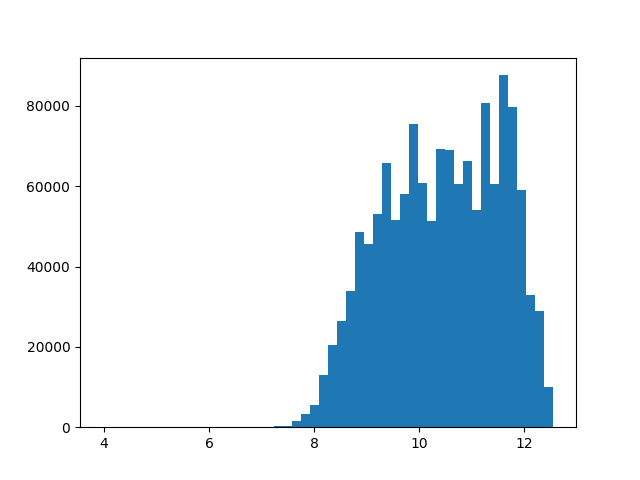

In [7]:
f = lambda edge : np.log(edge.width(t)*edge.length_um(t)*edge.end.degree(t)*edge.begin.degree(t))
edges = get_all_edges(exp, t)
values = [f(edge) for edge in edges]
weights = [edge.length_um(t) for edge in edges]

fig,ax = plt.subplots()
h = ax.hist(values,50,weights = weights)

In [15]:
def g(edge):
    boolean = (edge.end.degree(t)==1 or edge.begin.degree(t)==1) and edge.length_um(t)<1000
    # boolean +=((edge.width(t)*edge.length_um(t))<3000)*edge.width(t)<7
    return(boolean)


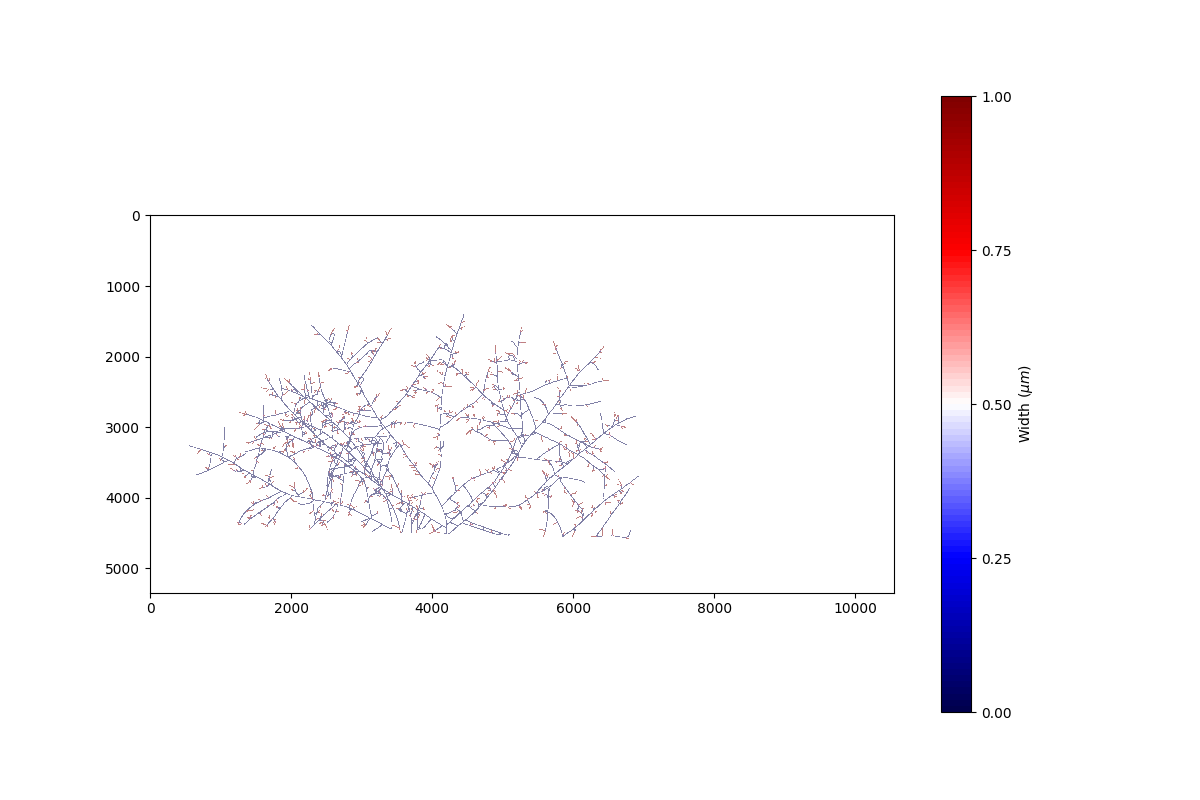

In [16]:
dpi=400

vmax = 1
vmin = 0
plot_edge_color_value(exp,t,lambda edge : g(edge),cmap = cm.get_cmap("seismic", 100),v_min =vmin,v_max = vmax,plot_cmap=True,show_background=False,dilation =10,figsize = (12,8))
path = r"/scratch-shared/amftrack/transport/full_picture/"
file_name = f'BAS.png'
save_path = os.path.join(path,file_name)
plt.savefig(save_path, dpi=dpi)

In [18]:
def h(edge,t):
    boolean = (edge.end.degree(t)==1 or edge.begin.degree(t)==1) and edge.length_um(t)<1000
    # boolean +=((edge.width(t)*edge.length_um(t))<3000)*edge.width(t)<7
    return(boolean)
edges = get_all_edges(exp, t)
edge_tip = [edge for edge in edges if h(edge,t)]

In [19]:
len(edge_tip)

800

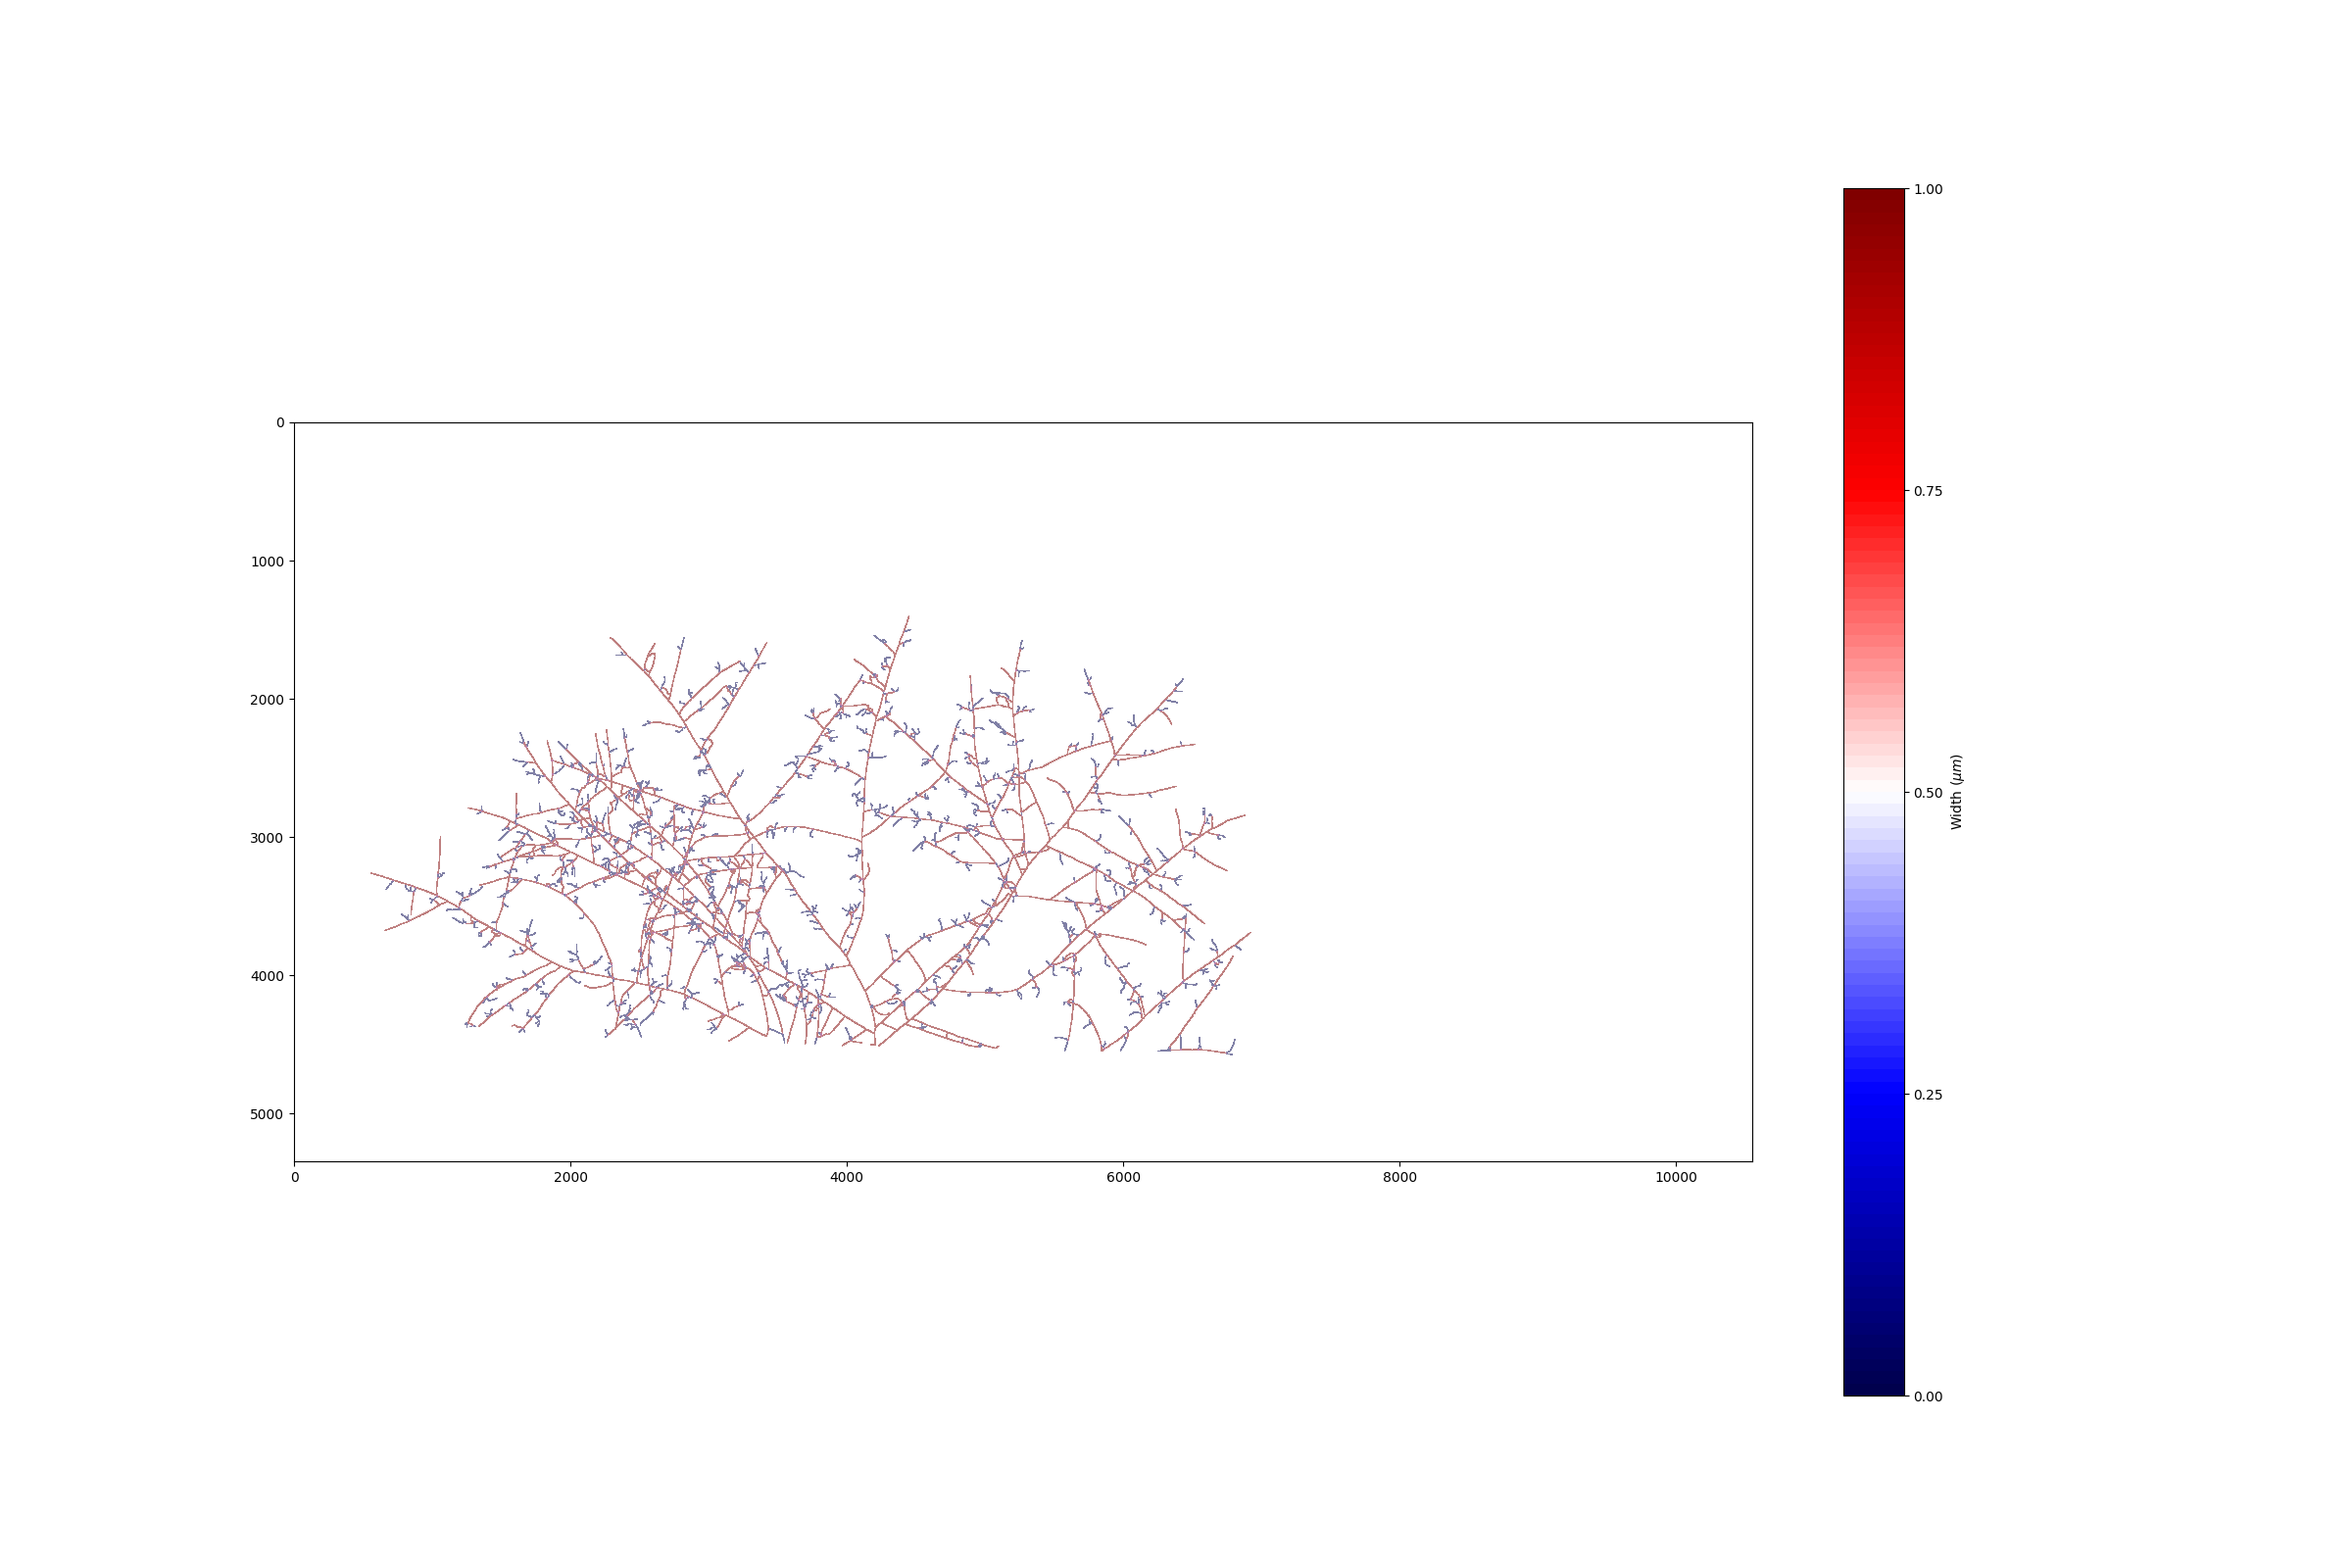

In [8]:
dpi=400

vmax = 1
vmin = 0
plot_edge_color_value(exp,t,lambda edge : f(edge)>10,cmap = cm.get_cmap("seismic", 100),v_min =vmin,v_max = vmax,plot_cmap=True,show_background=False,dilation =10,figsize = (24,16))
path = r"/scratch-shared/amftrack/transport/full_picture/"
file_name = f'BAS.png'
save_path = os.path.join(path,file_name)
plt.savefig(save_path, dpi=dpi)

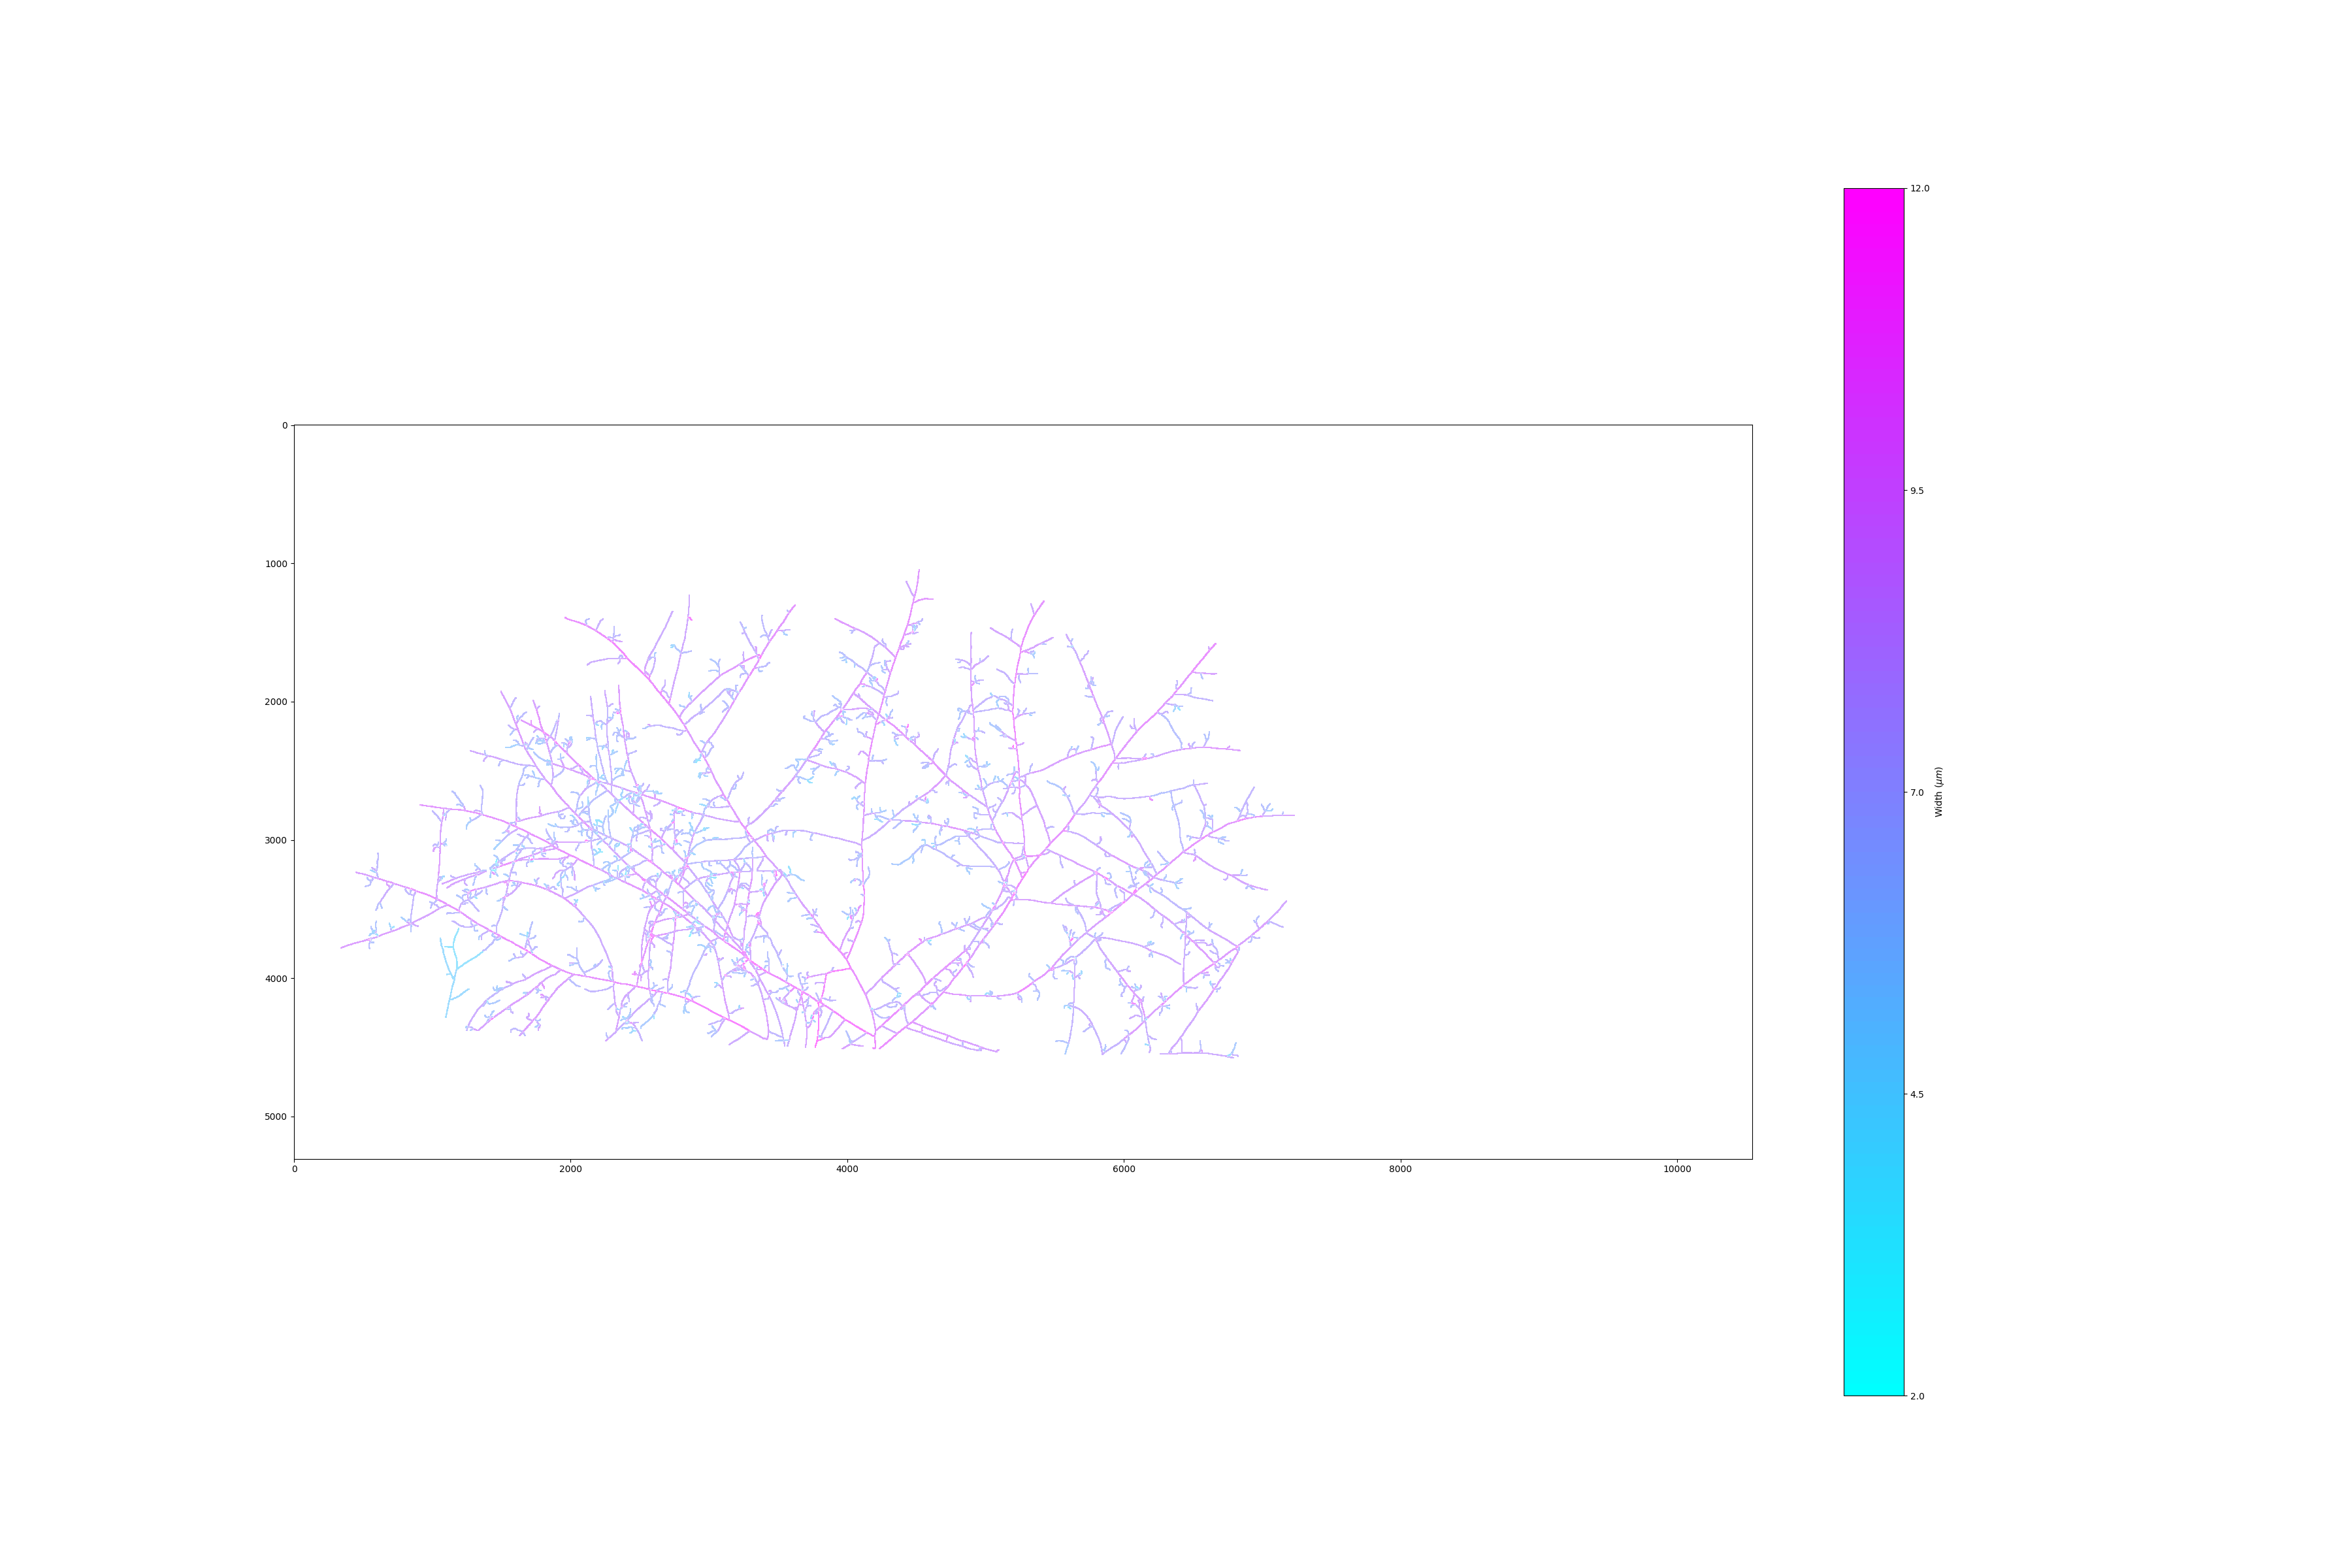

NameError: name 'dpi' is not defined

In [6]:
vmax = 12
vmin = 2
plot_edge_color_value(exp,t,lambda edge : edge.width(t),cmap = cm.get_cmap("cool", 100),v_min =vmin,v_max = vmax,plot_cmap=True,show_background=False,dilation =10)
path = r"/scratch-shared/amftrack/transport/full_picture/"
file_name = f'width.png'
save_path = os.path.join(path,file_name)
plt.savefig(save_path, dpi=dpi)

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


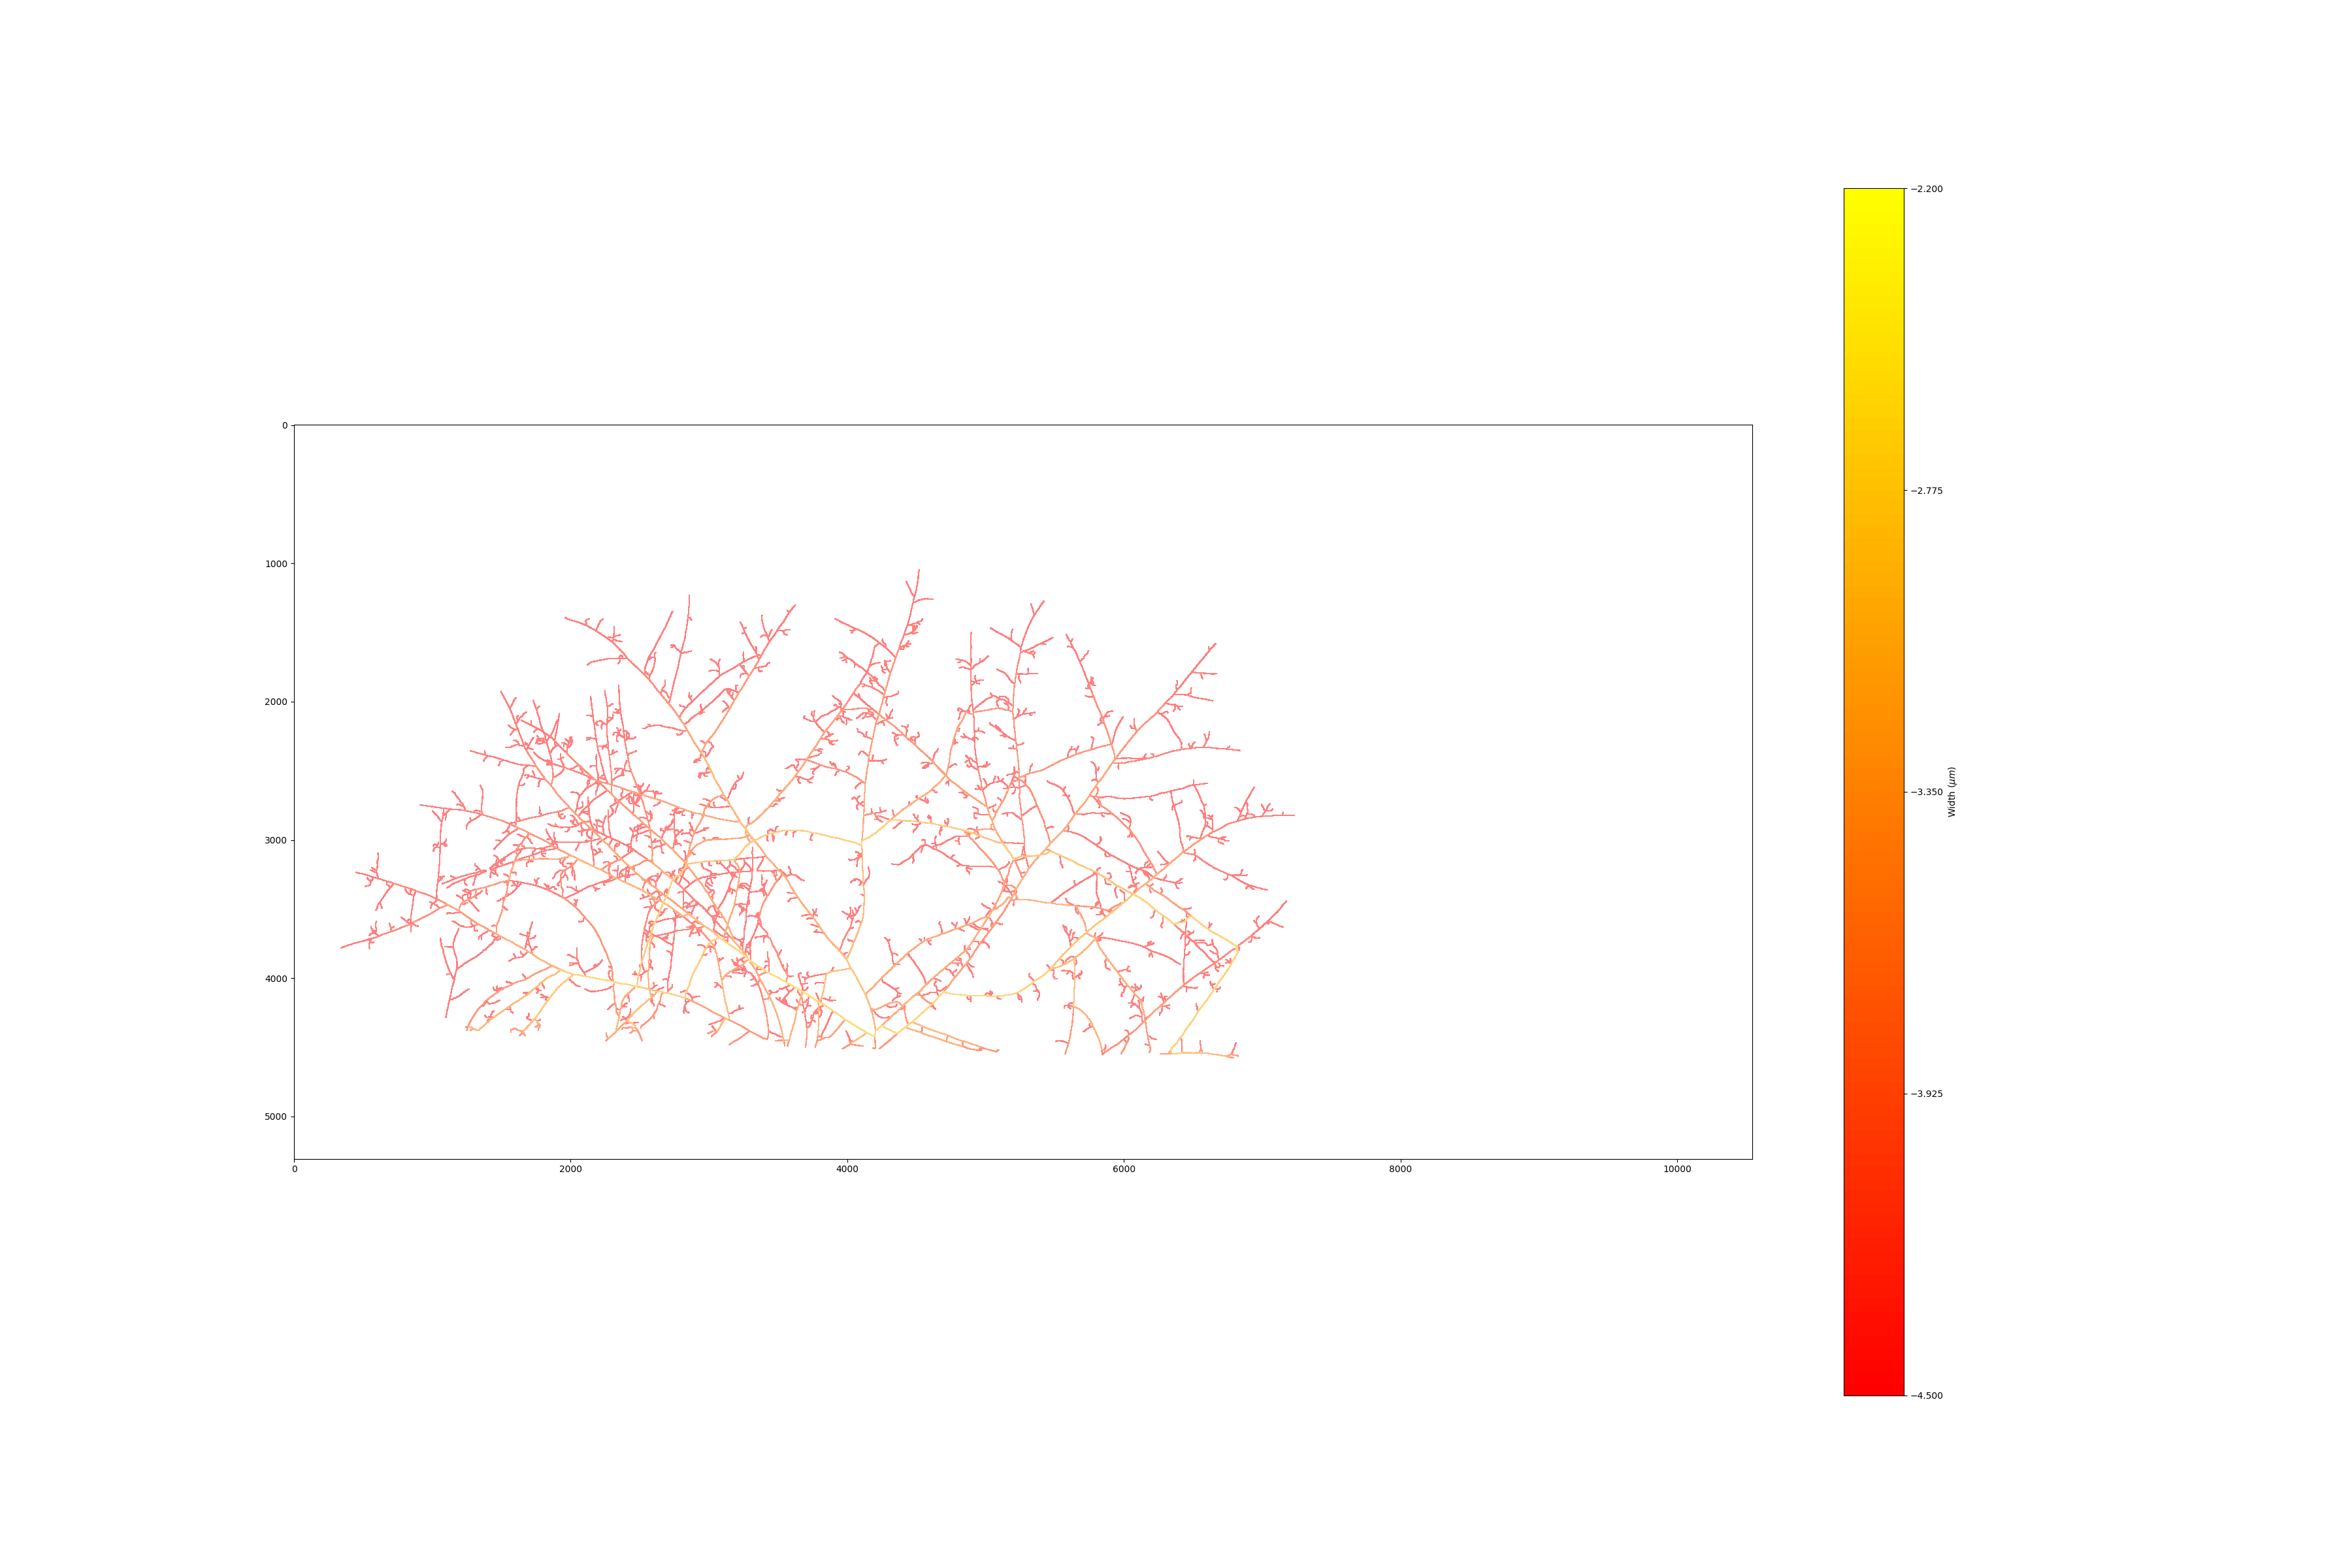

In [23]:
plt.close('all')
vmax = -2.2
vmin = -4.5
ax = plot_edge_color_value(exp,t,lambda edge : np.log10(edge.betweeness(t)),cmap = cm.get_cmap("autumn", 100),v_min =vmin,v_max = vmax,plot_cmap=True,show_background=False,dilation =10)
path = r"/scratch-shared/amftrack/transport/full_picture/"
file_name = f'betweeness.png'
save_path = os.path.join(path,file_name)
plt.savefig(save_path, dpi=dpi)

In [ ]:
plt.close('all')
vmax = -2.2
vmin = -4.5
ax = plot_edge_color_value(exp,t,lambda edge : np.log10(edge.current_flow_betweeness(t)),cmap = cm.get_cmap("cool", 100),v_min =vmin,v_max = vmax,plot_cmap=True,show_background=False,dilation =10)
path = r"/scratch-shared/amftrack/transport/full_picture/"
file_name = f'betweeness_random.png'
save_path = os.path.join(path,file_name)
plt.savefig(save_path, dpi=dpi)
file_name = f'betweeness_random.csv'
save_path = os.path.join(path,file_name)
plt.savefig(save_path)
file_name = f'betweeness_random.eps'
save_path = os.path.join(path,file_name)
plt.savefig(save_path)

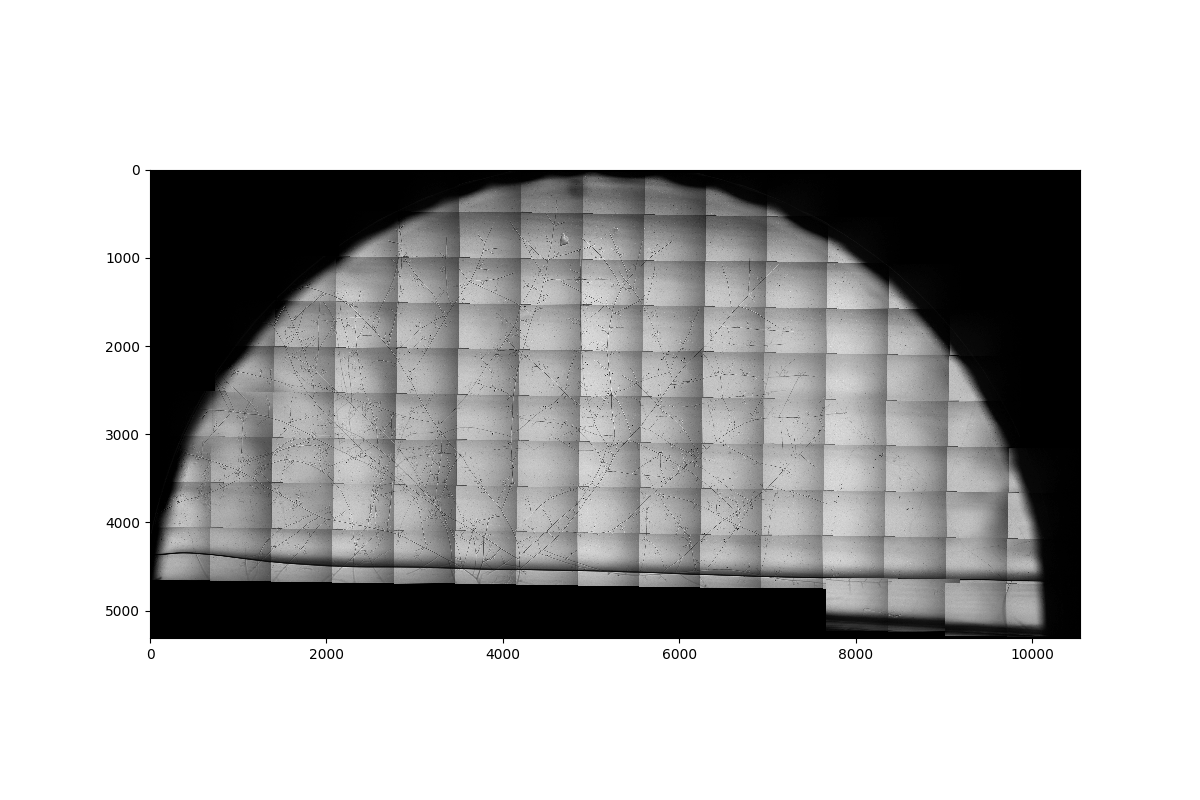

In [6]:
vmax = 0
vmin = 10
dpi=400

# ax = plot_edge_color_value(exp,t,lambda edge : 5,cmap = cm.get_cmap("Reds", 100),v_min =vmin,v_max = vmax,plot_cmap=True,show_background=True,dilation =10,figsize = (12,8))
ax = plot_full(exp,t)
ax.scatter(spore_datatable['y']/5,spore_datatable['x']/5,s = 20,color = 'blue',alpha = 0.4)
path = r"/scratch-shared/amftrack/transport/full_picture/"
file_name = f'spores.png'
save_path = os.path.join(path,file_name)
# plt.savefig(save_path, dpi=dpi)

In [7]:
edges = get_all_edges(exp, t)
nodes = get_all_nodes(exp, t)

In [8]:
nodes_source = [node for node in nodes if not is_in_study_zone(node,t,1000,150)[1] and is_in_study_zone(node,t,1000,150)[0]]

In [9]:

nodes_sink = [node for node in nodes if is_in_study_zone(node,t,1000,150)[1] and node.degree(t)==1]
# nodes_sink = [node for node in nodes if is_in_study_zone(node,t,1000,150)[1] ]

In [16]:
len(nodes_source),len(nodes_sink)

(138, 852)

In [10]:
weights = {(edge.begin.label,edge.end.label) : edge.length_um(t) for edge in edges}
nx.set_edge_attributes(exp.nx_graph[t] , weights, "length")
weights = {(edge.begin.label,edge.end.label) : 1/edge.length_um(t) for edge in edges}
nx.set_edge_attributes(exp.nx_graph[t] , weights, "1/length")

In [32]:
t =0
G = exp.nx_graph[t]
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
len_connected=[len(nx_graph.nodes) for nx_graph in S]
final_current_flow_betweeness = {}
final_betweeness = {}

for g in S:
    source = [node.label for node in nodes_source if node.label in g]
    sink = [node.label for node in nodes_sink if node.label in g]
    current_flow_betweeness = nx.edge_current_flow_betweenness_centrality_subset(g,source,sink,weight = "1/length")
    betweeness = nx.edge_current_flow_betweenness_centrality_subset(g,sink,source,weight = "length")
    
    # betweeness = nx.edge_betweenness_centrality_subset(g,source,sink,normalized=True,weight = "length")
    for edge in current_flow_betweeness.keys():
        final_current_flow_betweeness[edge]=current_flow_betweeness[edge]
    for edge in betweeness.keys():
        final_betweeness[edge]=betweeness[edge]
        
for edge in exp.nx_graph[t].edges:
    if edge not in final_current_flow_betweeness.keys() and (edge[1],edge[0]) not in final_current_flow_betweeness.keys():
        final_current_flow_betweeness[edge] = 0
    if edge not in final_betweeness.keys() and (edge[1],edge[0]) not in final_betweeness.keys():
        final_betweeness[edge] = 0        
nx.set_edge_attributes(exp.nx_graph[t] , final_current_flow_betweeness, "current_flow_betweenness")
nx.set_edge_attributes(exp.nx_graph[t] , final_betweeness, "betweenness")
betweenessses = list(final_current_flow_betweeness.values())
np.mean(betweenessses),np.max(betweenessses)


(0.0002276309625805852, 0.0019489357368749837)

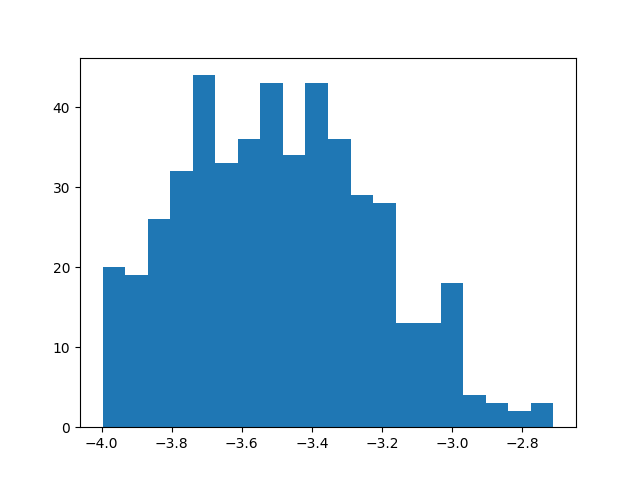

In [30]:
betweenessses = list(final_current_flow_betweeness.values())
betweenessses2 = list(final_betweeness.values())
fig,ax = plt.subplots()
h = ax.hist(np.log10([bet for bet in betweenessses if bet >1e-4]),20)

In [16]:
final_current_flow_betweeness[(527418, 512522)],final_betweeness[(527418, 512522)]

(0.0004879946616729095, 0.00048799466167290923)

In [12]:
final_current_flow_betweeness[(527418, 512522)],final_betweeness[(527418, 512522)]

(0.0004879946616729095, 0.000504582530241318)

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


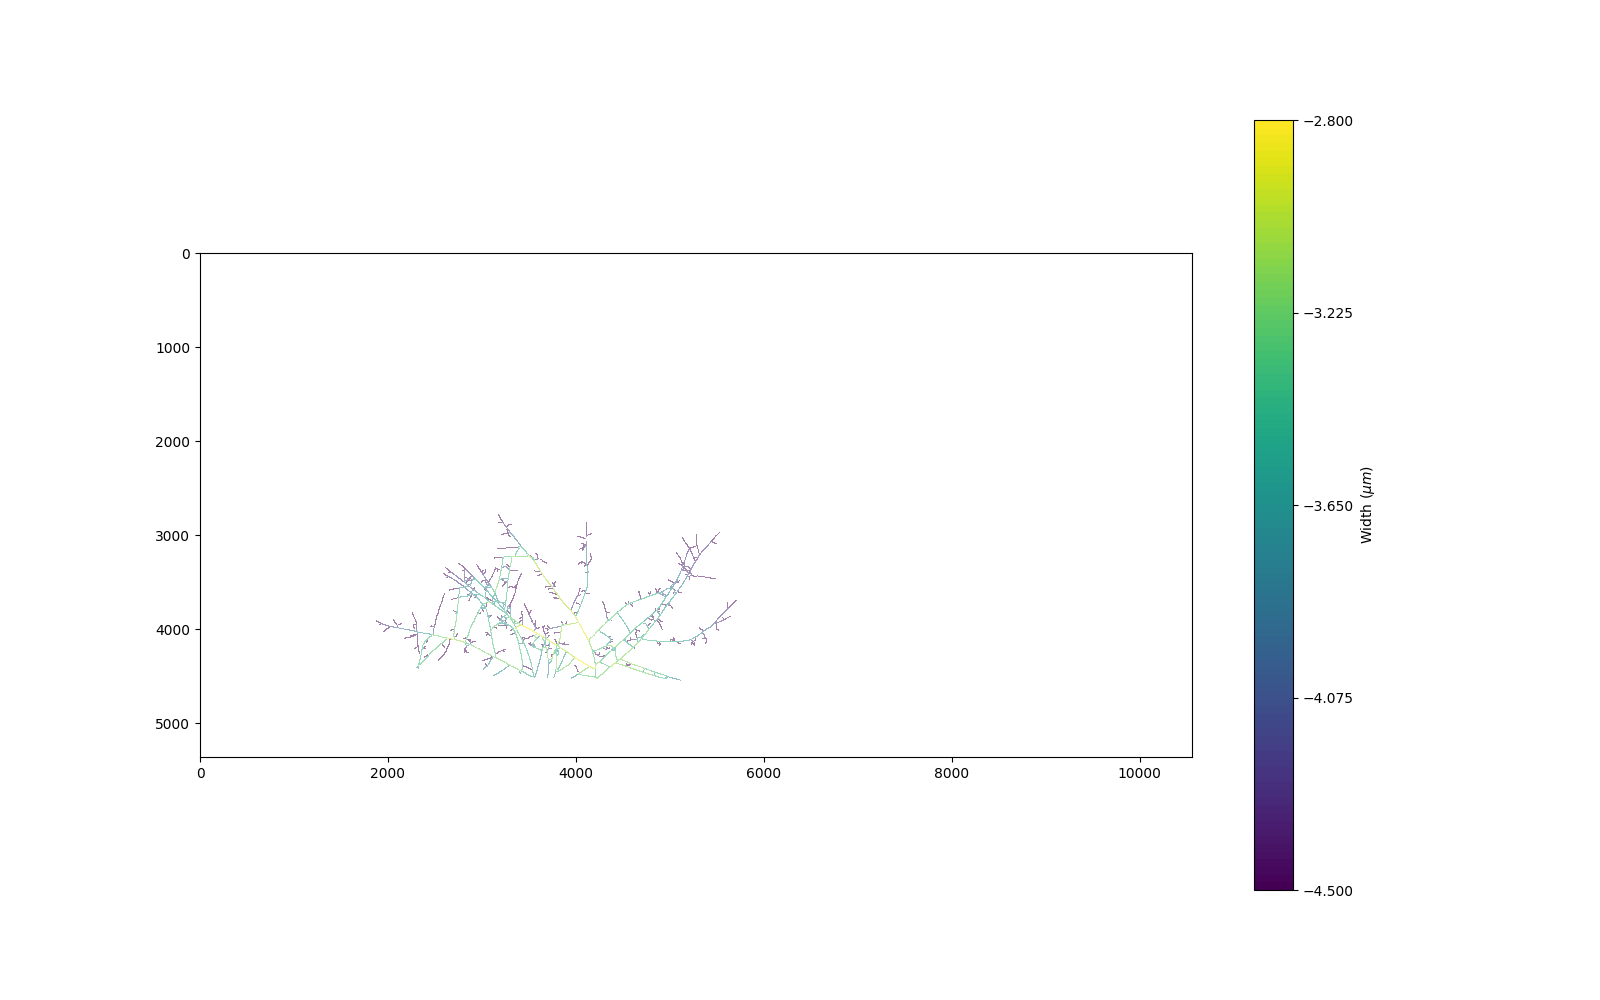

In [33]:
plt.close('all')
vmax = -2.8
vmin = -4.5
ax = plot_edge_color_value(exp,t,lambda edge : np.log10(edge.current_flow_betweeness(t)),cmap = cm.get_cmap("viridis", 100),v_min =vmin,v_max = vmax,plot_cmap=True,show_background=False,dilation =10,figsize = (16,10))
# path = r"/scratch-shared/amftrack/transport/full_picture/"
# file_name = f'betweeness_random.png'
# save_path = os.path.join(path,file_name)
# plt.savefig(save_path, dpi=dpi)

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


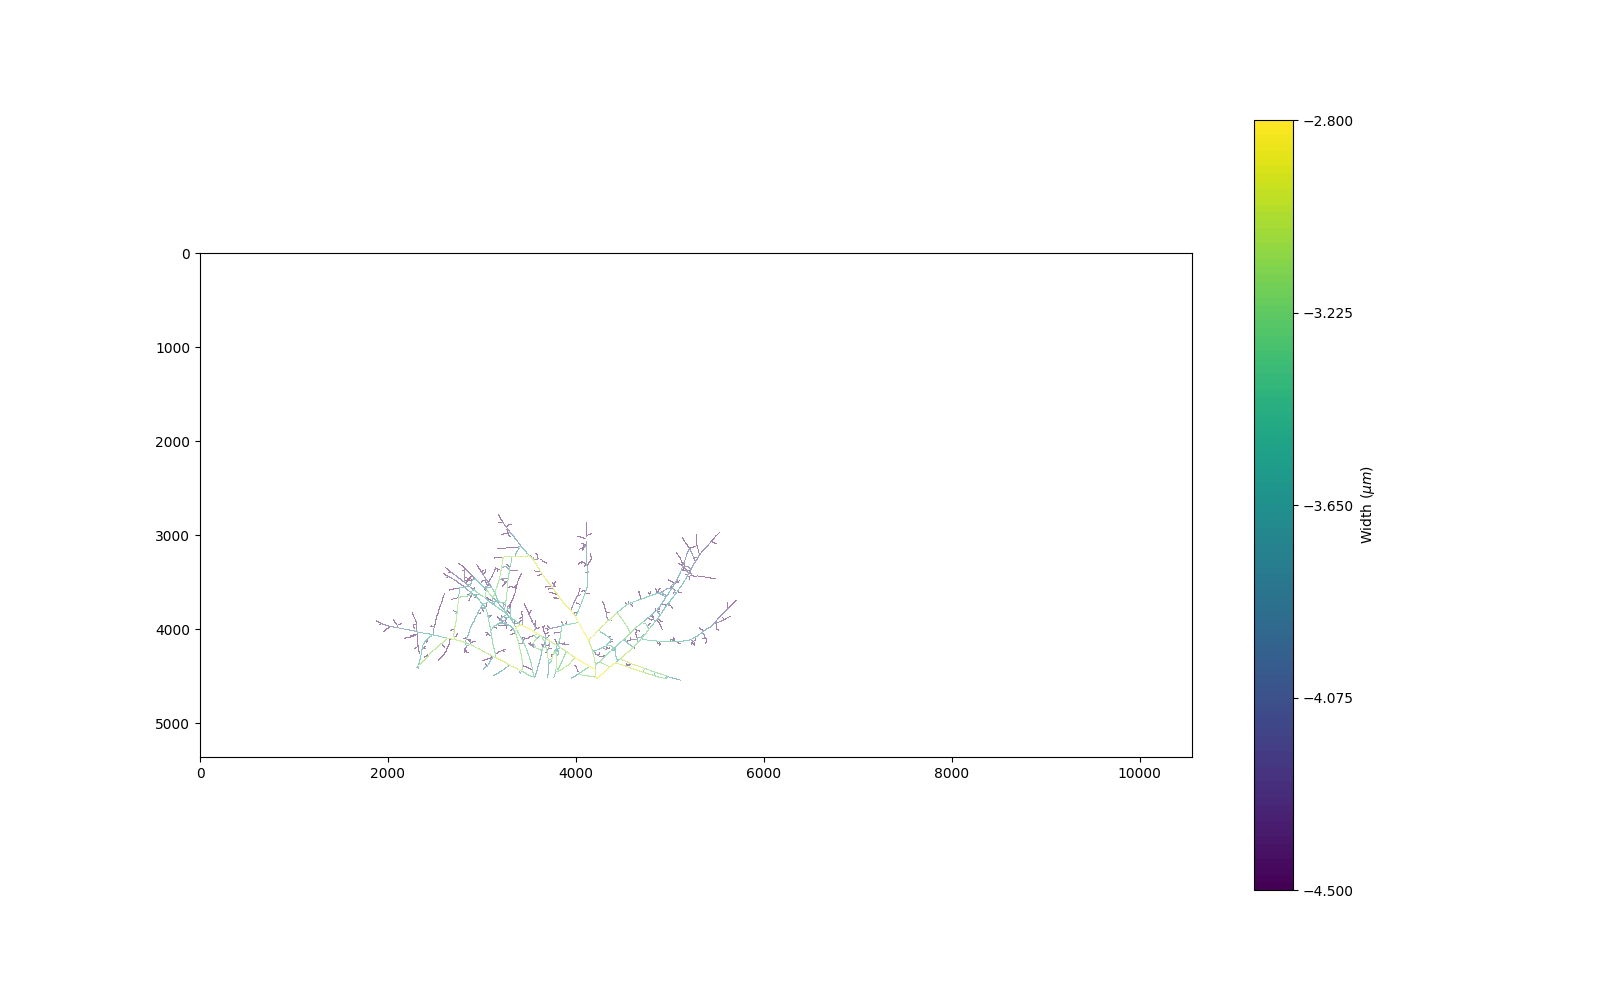

In [35]:
vmax = -2.8
vmin = -4.5
ax = plot_edge_color_value(exp,t,lambda edge : np.log10(edge.betweeness(t)),cmap = cm.get_cmap("viridis", 100),v_min =vmin,v_max = vmax,plot_cmap=True,show_background=False,dilation =10,figsize = (16,10))
# path = r"/scratch-shared/amftrack/transport/full_picture/"
# file_name = f'betweeness_random.png'
# save_path = os.path.join(path,file_name)
# plt.savefig(save_path, dpi=dpi)

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


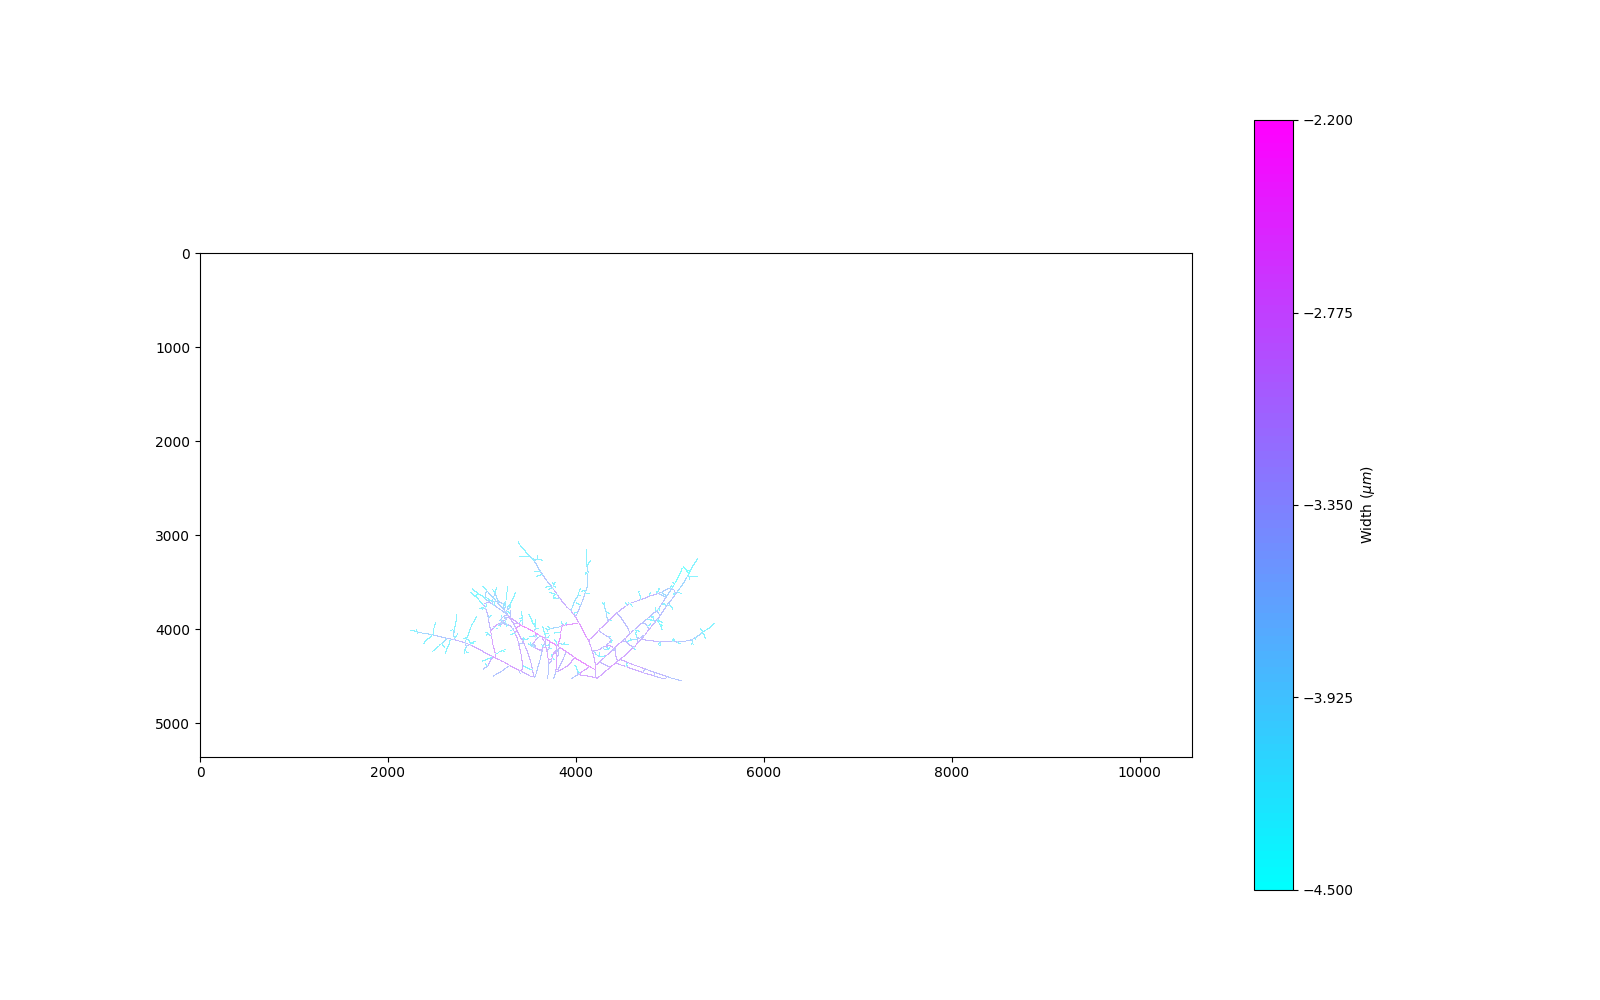

In [24]:
plt.close('all')
vmax = -2.8
vmin = -4.5
ax = plot_edge_color_value(exp,t,lambda edge : np.log10(edge.current_flow_betweeness(t)),cmap = cm.get_cmap("cool", 100),v_min =vmin,v_max = vmax,plot_cmap=True,show_background=False,dilation =10,figsize = (16,10))
# path = r"/scratch-shared/amftrack/transport/full_picture/"
# file_name = f'betweeness_random.png'
# save_path = os.path.join(path,file_name)
# plt.savefig(save_path, dpi=dpi)

In [ ]:
betweenessses = list(current_flow_betweeness.values())
vmax = np.log10(np.max(betweenessses))
vmax

In [ ]:
betweenessses = [edge.current_flow_betweeness(t) for edge in edges]
betweenessses = [betweeness for betweeness in betweenessses if betweeness>1e-5]
np.max(betweenessses),np.mean(betweenessses)
fig,ax = plt.subplots()
ax.hist(np.log10(betweenessses))

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


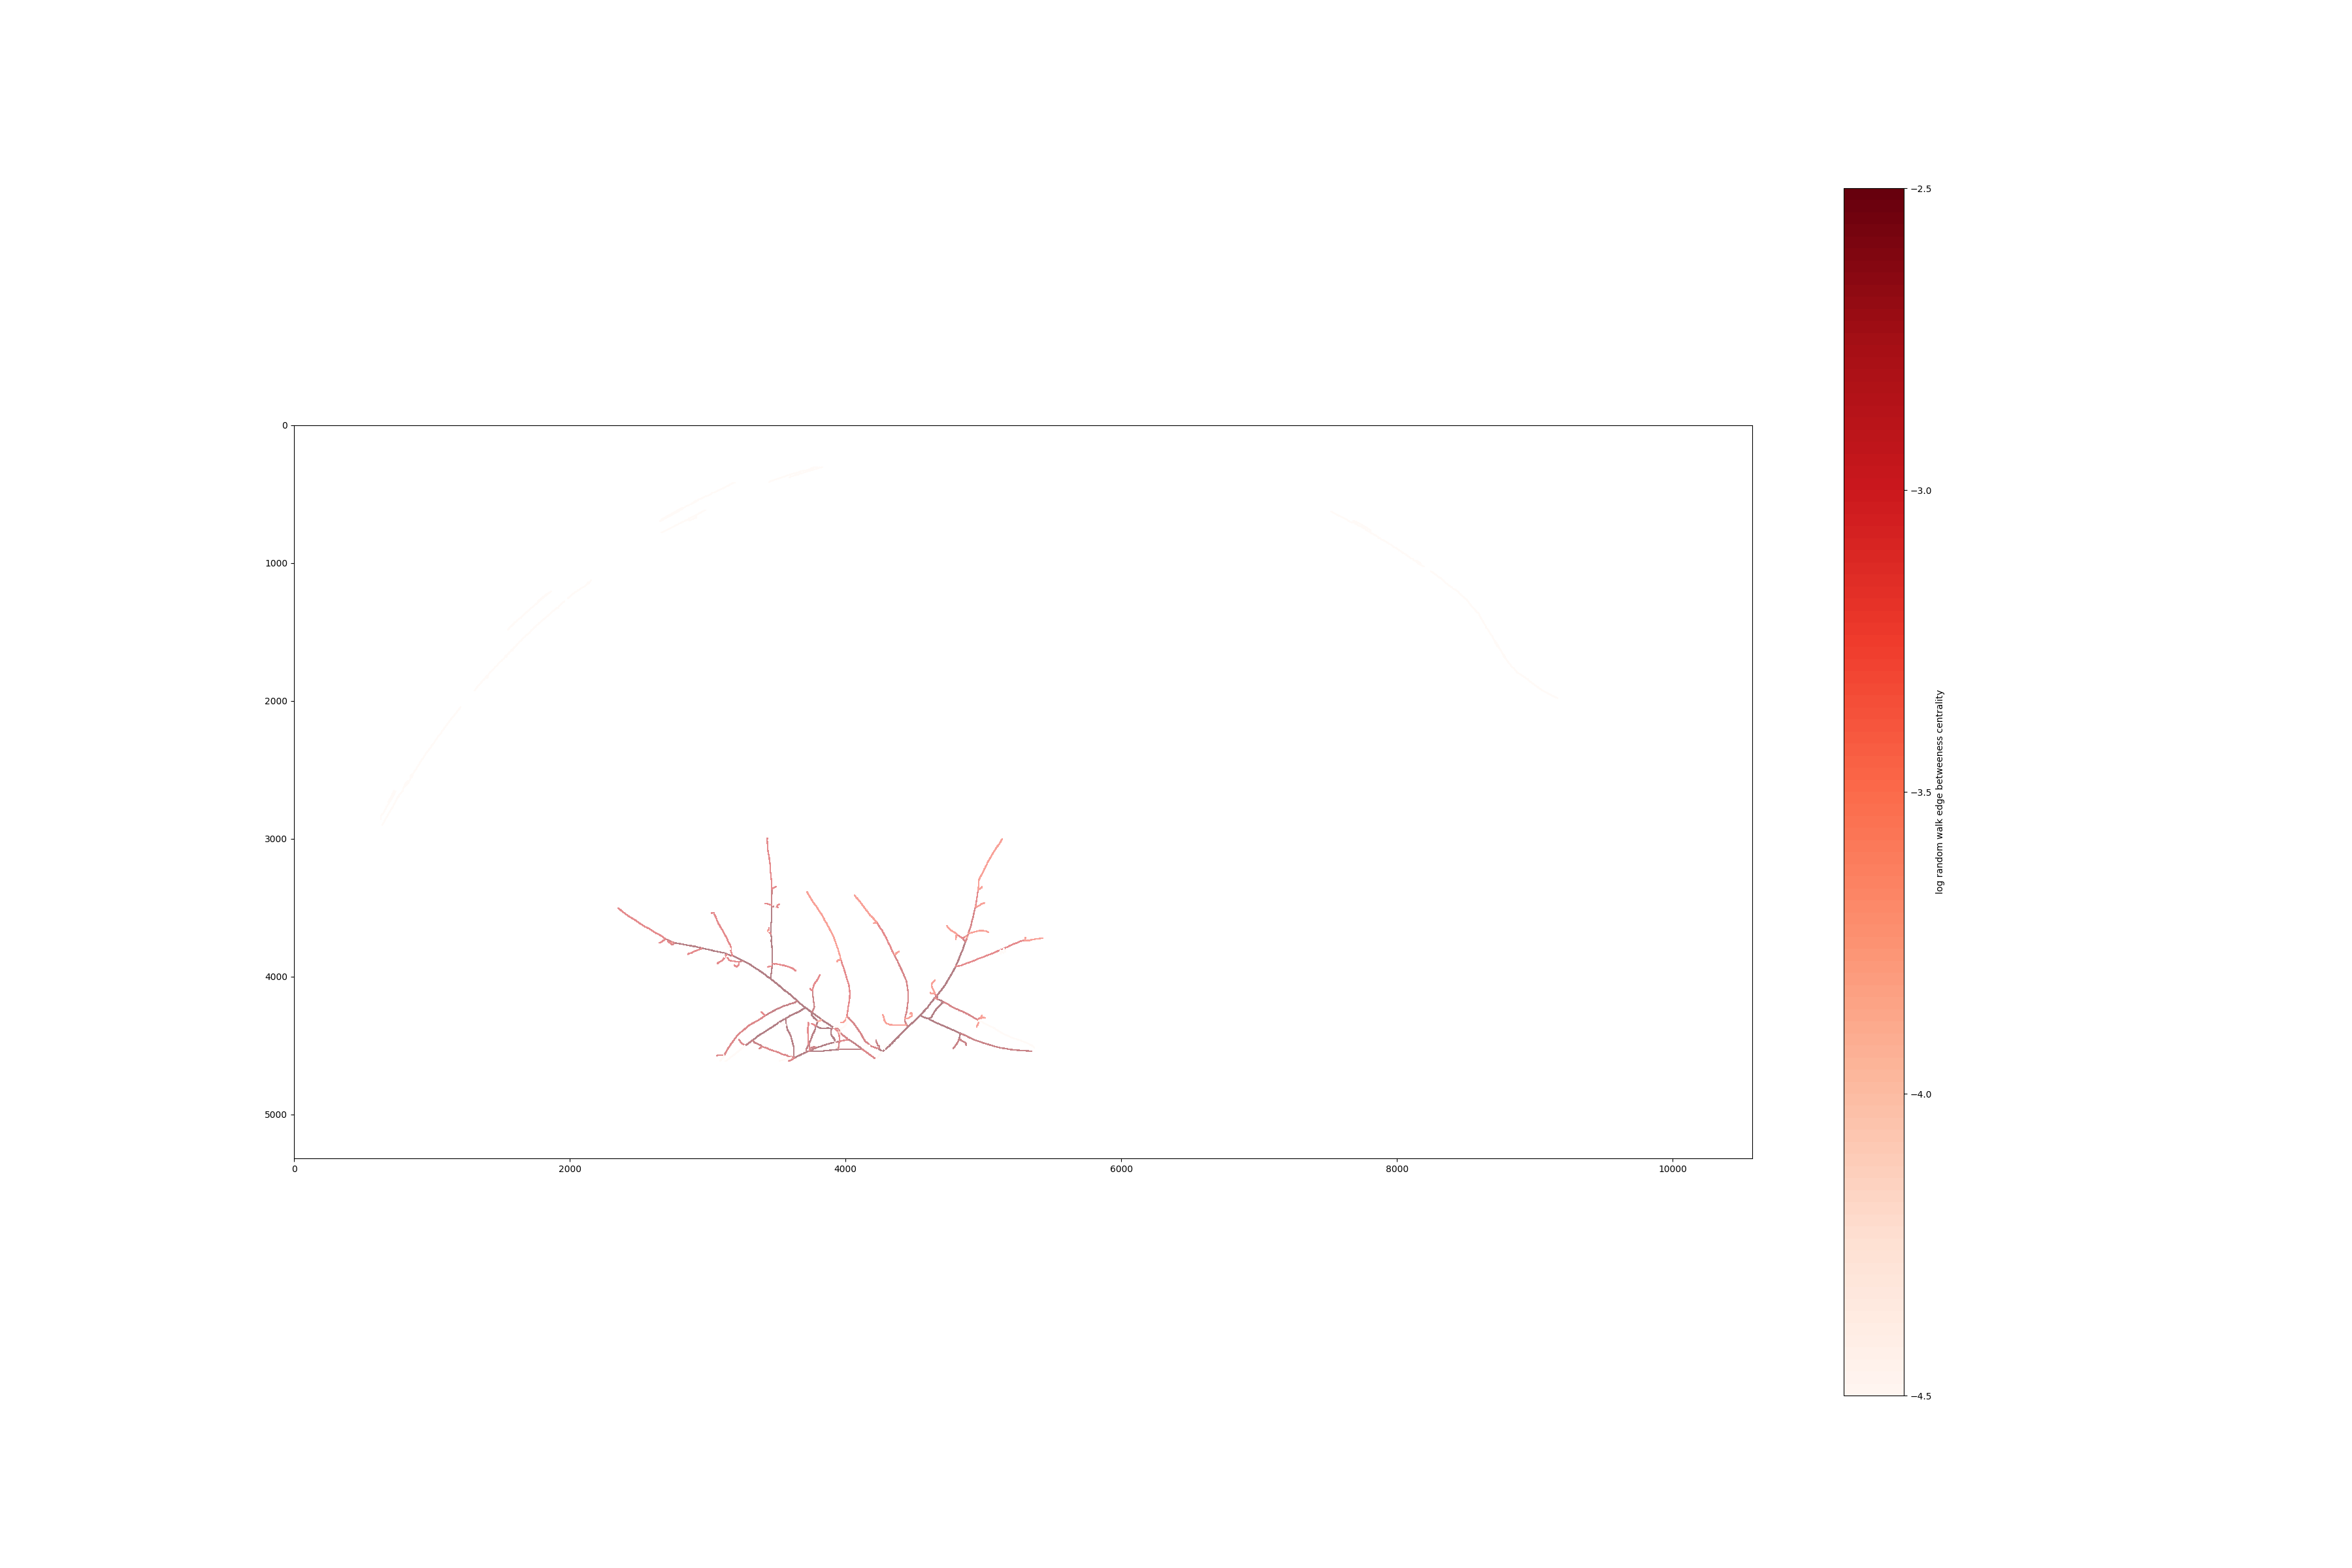

<AxesSubplot:>

In [ ]:
plt.close("all")
# betweenessses = list(current_flow_betweeness.values())
vmax = -2.5
vmin = -4.5

plot_edge_color_value(exp,t,lambda edge : np.log10(edge.current_flow_betweeness(t)),cmap = cm.get_cmap("Reds", 100),v_min =vmin,v_max = vmax,plot_cmap=True,show_background=False,dilation =10,label_colorbar = "log random walk edge betweeness centrality")

In [ ]:
betweenessses = [edge.betweeness(t) for edge in edges]
betweenessses = [betweeness for betweeness in betweenessses if betweeness>0]
np.max(betweenessses),np.mean(betweenessses)
fig,ax = plt.subplots()
ax.hist(np.log10(betweenessses))